In [120]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matrix import *

def plot_data(data, name, annotate=True):
    num_unique_values = len(np.unique(data))
    boundaries = np.linspace(np.min(data), np.max(data), num=num_unique_values + 1)
    cmap = plt.get_cmap('viridis', len(boundaries) - 1)
    norm = BoundaryNorm(boundaries, cmap.N, clip=False)

    fig, ax = plt.subplots()
    cax = ax.imshow(data, cmap=cmap, norm=norm)

    # Add text annotations for each pixel
    if annotate:
        for i in range(data.shape[0]):
            for j in range(data.shape[1]):
                ax.text(j, i, f'{data[i, j]}', va='center', ha='center', color='w')

    # Create a colorbar with discrete values
    cbar = fig.colorbar(cax, cmap=cmap, norm=norm, ticks=boundaries[1:], format='%d')

    plt.title(name)
    plt.show()

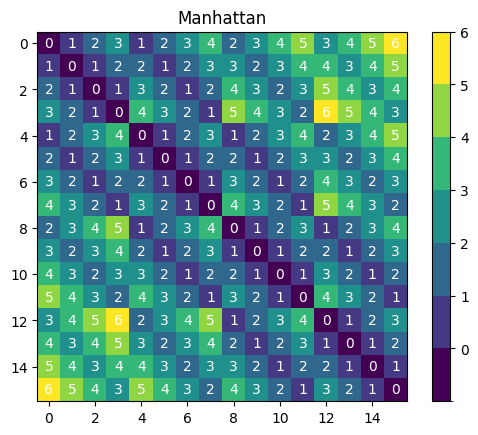

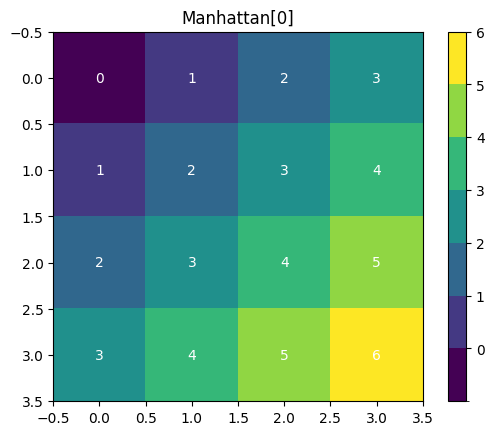

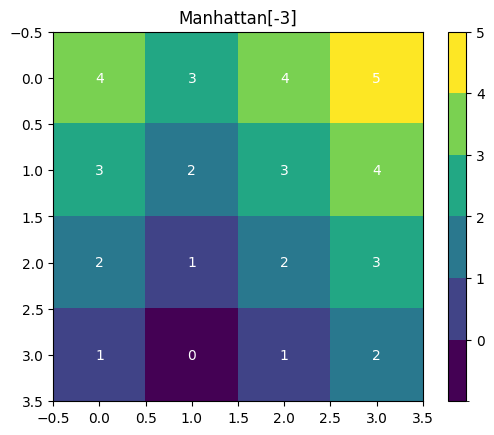

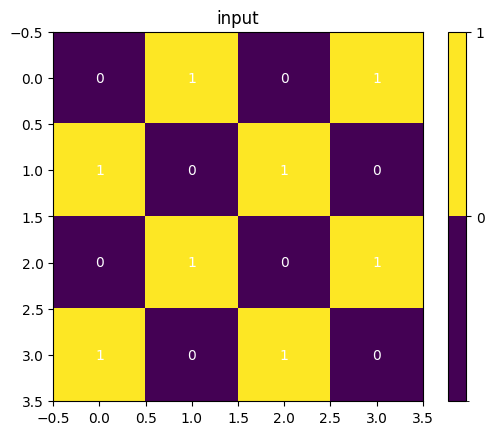

In [121]:


N = 4
r = 6

man = distance_manhattan(N)
# wrap = distance_wrapped(N)
filter_man = np.where(man > r, 0, man)
# filter_wrap = np.where(wrap > r, 0, wrap)

# print(wrap[0])

alternating = np.zeros((N, N), dtype=int)
alternating[1::2, ::2] = 1
alternating[::2, 1::2] = 1

plot_data(filter_man, "Manhattan")
plot_data(filter_man[0].reshape((N,N)), "Manhattan[0]")
plot_data(filter_man[-3].reshape((N,N)), "Manhattan[-3]")
plot_data(alternating, "input")
# plot_data(filter_wrap, "Wrapped manhattan")

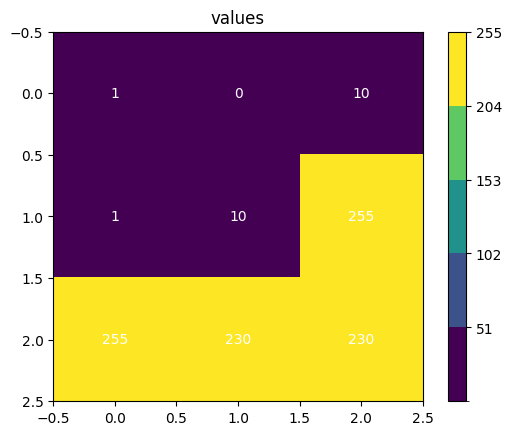

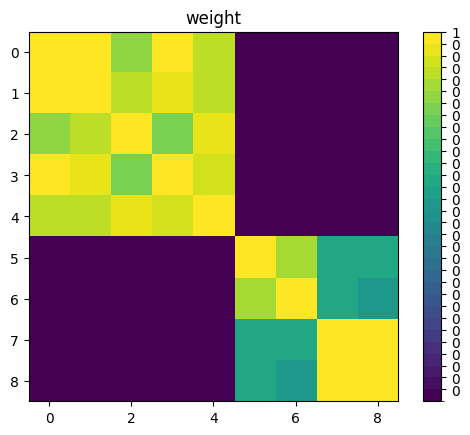

In [122]:
N2 = 3
values = np.array([[1,0,10],
                  [1,10,255],
                  [255,230,230]])

weight = dissimilarity(values/255) # normalization is a must, otherwise infintessimally small values (using the nc weight scheme at least)

plot_data(values, 'values')
plot_data(weight, 'weight', annotate=False)
# plot_data(weight[0].reshape(values.shape), 'weight[0]', annotate=False)
# plot_data(weight[3].reshape(values.shape), 'weight[3]', annotate=False)
# plot_data(weight[-3].reshape(values.shape), 'weight[-3]', annotate=False)

In [123]:
def plot_data_list_hist(data_list, names, title=None,annotate=True):
    num_plots = len(data_list)
    
    fig, axes = plt.subplots(1, 2 * num_plots, figsize=(10 * num_plots, 5))

    for idx, data in enumerate(data_list):
        num_unique_values = len(np.unique(data))
        boundaries = np.linspace(np.min(data), np.max(data), num=num_unique_values + 1)
        cmap = plt.get_cmap('viridis', len(boundaries) - 1)
        norm = BoundaryNorm(boundaries, cmap.N, clip=False)

        image_ax = axes[2 * idx]
        hist_ax = axes[2 * idx + 1]

        # Plot the image on the left subplot
        cax = image_ax.imshow(data, cmap=cmap, norm=norm)

        if annotate:
            for i in range(data.shape[0]):
                for j in range(data.shape[1]):
                    image_ax.text(j, i, f'{data[i, j]:.3f}', va='center', ha='center', color='w')

        cbar = fig.colorbar(cax, ax=image_ax, cmap=cmap, norm=norm, ticks=boundaries[1:], format='%d')
        image_ax.set_title(names[idx])

        # Plot a histogram on the right subplot
        hist_ax.hist(data.ravel(), bins=9, color='blue', alpha=0.7)
        hist_ax.set_xlabel('Value')
        hist_ax.set_ylabel('Frequency')
        hist_ax.set_title(f'Histogram - {names[idx]}')

    if title is not None:
        fig.suptitle(title)
    # Adjust the spacing between subplots
    plt.tight_layout()
    plt.show()

In [124]:
import scipy
def get_cuts(weight, cases):
    all_vecs = []
    names = []
    if 1 in cases:
        # eigenvectors[:, i] column is normalized eigenvector corresponding to the eigenvalue eigenvalues[i]. 
        vals, vecs = np.linalg.eigh(weight)
        print(vals)
        
        # should already be sorted
        idx = np.argsort(vals)
        print(idx)
        all_vecs.append(vecs[:, idx[0]])
        all_vecs.append(vecs[:, idx[1]])
        names.extend(['np.linalg.eigh[:, 0]', 'np.linalg.eigh[:, 1]'])
        
    if 2 in cases:
        vals, vecs = np.linalg.eig(weight)
        print(vals)
        
        # reverse order (but not guaranteed?)
        idx = np.argsort(vals)
        print(idx)
        all_vecs.append(vecs[:, idx[0]])
        all_vecs.append(vecs[:, idx[1]])
        names.extend(['np.linalg.eig[:, 0]', 'np.linalg.eig[:, 1]'])
        
    if 3 in cases:
        vals, vecs = scipy.linalg.eigh(weight)
        print(vals)
        
        idx = np.argsort(vals)
        print(idx)
        all_vecs.append(vecs[:, idx[0]])
        all_vecs.append(vecs[:, idx[1]])
        names.extend(['scipy.linalg.eigh[:, 0]', 'scipy.linalg.eigh[:, 1]'])
        
    if 4 in cases:
        vals, vecs = scipy.linalg.eig(weight)
        print(vals)
        
        idx = np.argsort(vals)
        print(idx)
        all_vecs.append(vecs[:, idx[0]])
        all_vecs.append(vecs[:, idx[1]])
        names.extend(['scipy.linalg.eig[:, 0]', 'scipy.linalg.eig[:, 1]'])

    return all_vecs, names

def get_cuts_general(A,B, cases):
    all_vecs = []
    names = []
    if 1 in cases:
        # eigenvectors[:, i] column is normalized eigenvector corresponding to the eigenvalue eigenvalues[i]. 
        vals, vecs = scipy.linalg.eigh(A,B)
        print(vals)
        
        idx = np.argsort(vals)
        print(idx)
        all_vecs.append(vecs[:, idx[0]])
        all_vecs.append(vecs[:, idx[1]])
        names.extend(['scipy.linalg.eigh(a,b)[:, 0]', 'scipy.linalg.eigh(a,b)[:, 1]'])
    if 2 in cases:
        # eigenvectors[:, i] column is normalized eigenvector corresponding to the eigenvalue eigenvalues[i]. 
        vals, vecs = scipy.linalg.eig(A,B)
        print(vals)
        
        idx = np.argsort(vals)
        print(idx)
        all_vecs.append(vecs[:, idx[0]])
        all_vecs.append(vecs[:, idx[1]])
        names.extend(['scipy.linalg.eig(a,b)[:, 0]', 'scipy.linalg.eig(a,b):, 1]'])
    return all_vecs, names

[0.00647338 0.01723486 0.02013613 0.09736556 0.15468544 0.26272733
 0.74864354 3.07653489 4.61619887]
[0 1 2 3 4 5 6 7 8]
[4.61619887 3.07653489 0.26272733 0.09736556 0.00647338 0.01723486
 0.74864354 0.15468544 0.02013613]
[4 5 8 3 7 2 6 1 0]
[0.00647338 0.01723486 0.02013613 0.09736556 0.15468544 0.26272733
 0.74864354 3.07653489 4.61619887]
[0 1 2 3 4 5 6 7 8]
[4.61619887+0.j 3.07653489+0.j 0.26272733+0.j 0.09736556+0.j
 0.00647338+0.j 0.01723486+0.j 0.74864354+0.j 0.15468544+0.j
 0.02013613+0.j]
[4 5 8 3 7 2 6 1 0]


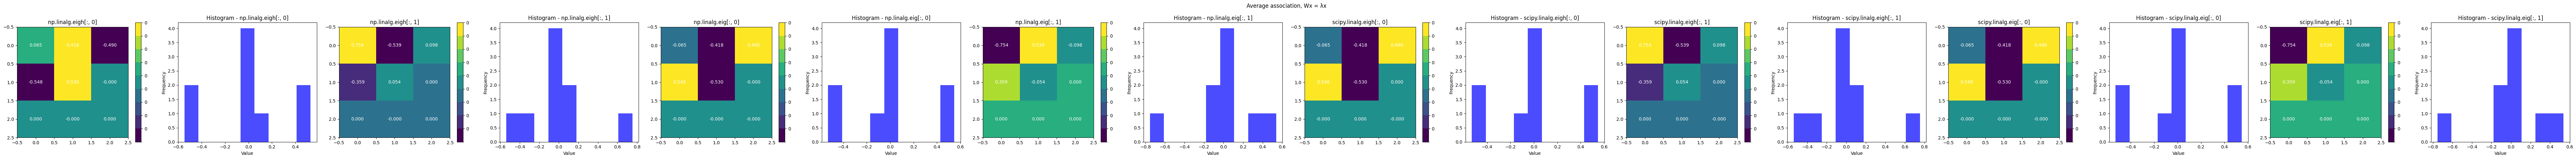

In [125]:
cases = [1,2,3,4]
all_vecs,names = get_cuts(weight, cases)
data_list = [vec.reshape((N2,N2)) for vec in all_vecs]
plot_data_list_hist(data_list, names, title='Average association, Wx = λx')

# TODO: scipy eigh with generalized option as well
# TODO: be happy

[-8.40946053e-16  2.66500231e-15  2.32346572e+00  2.86935133e+00
  3.10733825e+00  4.27844427e+00  4.53334169e+00  4.60757122e+00
  4.65488878e+00]
[0 1 2 3 4 5 6 7 8]
[ 4.27844427e+00  4.53334169e+00  4.65488878e+00  4.60757122e+00
 -1.87468166e-16  1.20802279e-16  2.32346572e+00  2.86935133e+00
  3.10733825e+00]
[4 5 6 7 8 0 1 3 2]
[3.67537647e-15 3.97905927e-15 2.32346572e+00 2.86935133e+00
 3.10733825e+00 4.27844427e+00 4.53334169e+00 4.60757122e+00
 4.65488878e+00]
[0 1 2 3 4 5 6 7 8]
[ 4.27844427e+00+0.j  4.53334169e+00+0.j  4.65488878e+00+0.j
  4.60757122e+00+0.j -1.87468166e-16+0.j  1.20802279e-16+0.j
  2.32346572e+00+0.j  2.86935133e+00+0.j  3.10733825e+00+0.j]
[4 5 6 7 8 0 1 3 2]


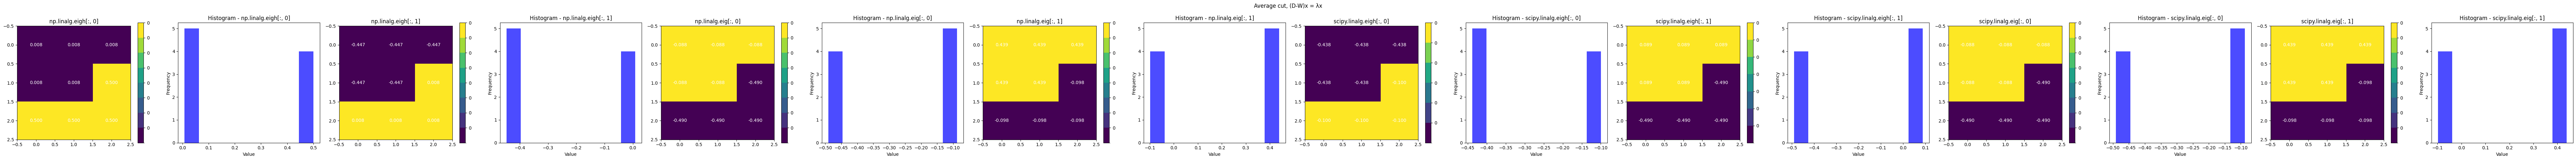

In [126]:
cases = [1,2,3,4]

# Average cut (D-W), non-generalized form
d = np.sum(weight, 1)
D = np.diag(d)

all_vecs,names = get_cuts(D-weight, cases)
data_list = [vec.reshape((N2,N2)) for vec in all_vecs]
plot_data_list_hist(data_list, names, title='Average cut, (D-W)x = λx')

[-1.18774129e-17 -3.69800698e-18  7.56258319e-01  9.42325416e-01
  9.48903260e-01  9.79008641e-01  9.93552915e-01  9.96301204e-01
  9.98593396e-01]
[0 1 2 3 4 5 6 7 8]
[ 9.42325416e-01+0.j  9.79008641e-01+0.j  9.96301204e-01+0.j
  9.98593396e-01+0.j -2.34868100e-17+0.j  2.71283918e-17+0.j
  7.56258319e-01+0.j  9.48903260e-01+0.j  9.93552915e-01+0.j]
[4 5 6 0 7 1 8 2 3]


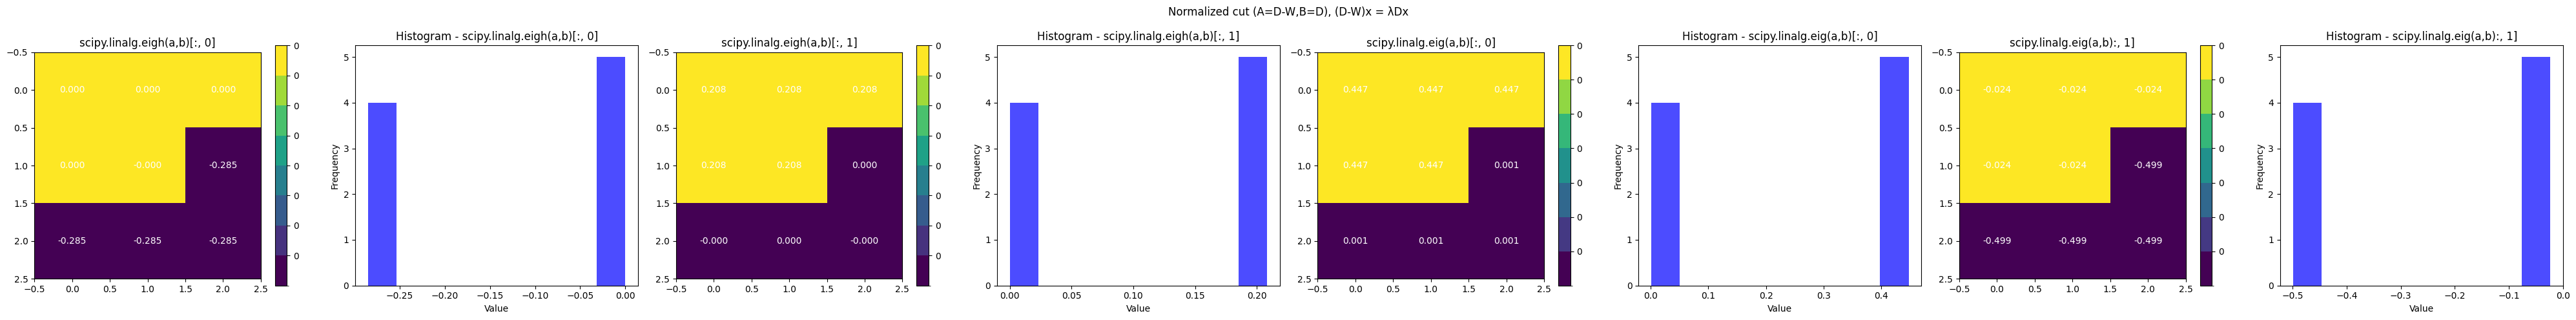

[0.0014066  0.0036988  0.00644708 0.02099136 0.05109674 0.05767458
 0.24374168 1.         1.        ]
[0 1 2 3 4 5 6 7 8]
[0.05767458+0.j 0.02099136+0.j 0.0036988 +0.j 0.0014066 +0.j
 1.        +0.j 1.        +0.j 0.24374168+0.j 0.05109674+0.j
 0.00644708+0.j]
[3 2 8 1 7 0 6 4 5]


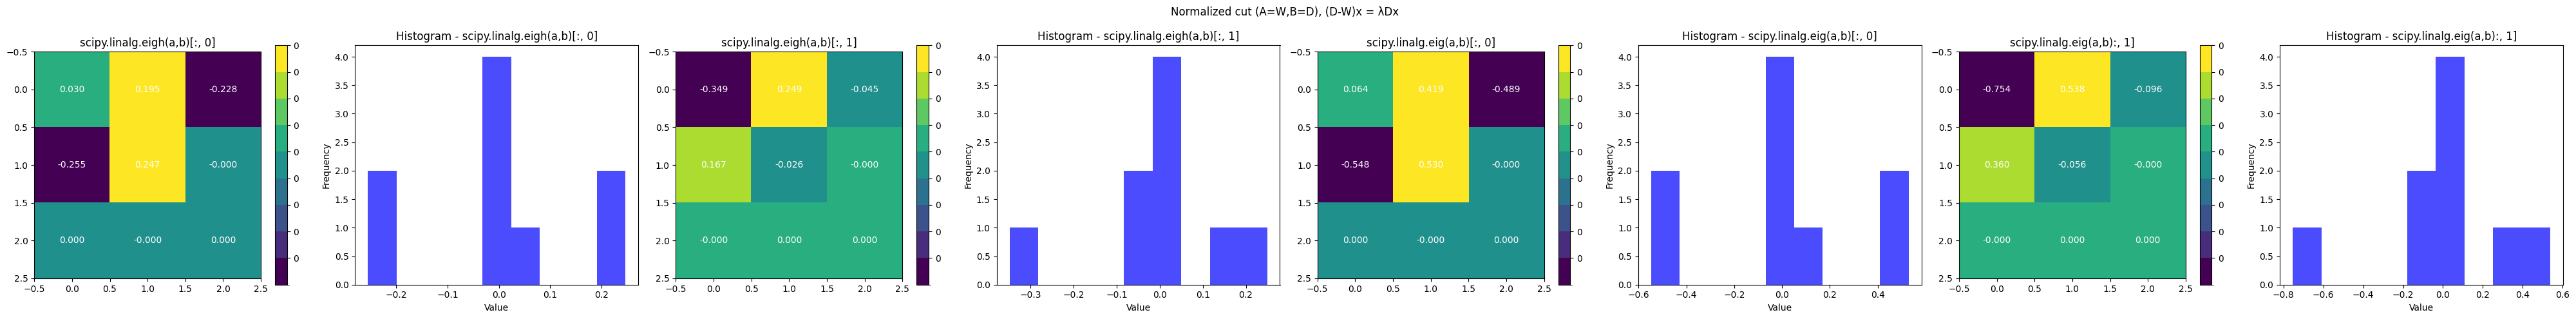

In [130]:
cases = [1,2]

# Normalized cuts (D-W), generalized form
d = np.sum(weight, 1)
D = np.diag(d)

A = D-weight
B = D
all_vecs,names = get_cuts_general(A,B, cases)
data_list = [vec.reshape((N2,N2)) for vec in all_vecs]
plot_data_list_hist(data_list, names, title='Normalized cut (A=D-W,B=D), (D-W)x = λDx') # or Wx = (1-λ)Dx

A = weight
B = D
all_vecs,names = get_cuts_general(A,B, cases)
data_list = [vec.reshape((N2,N2)) for vec in all_vecs]
plot_data_list_hist(data_list, names, title='Normalized cut (A=W,B=D), (D-W)x = λDx') # or Wx = (1-λ)Dx

In [128]:
if False:
    cases = [1,2,3,4]

    # Normalized cut (D-W), non-generalized form (EXPENSIVE ONE?? IDK)
    d = np.sum(weight, 1)
    D = np.diag(d)

    all_vecs,names = get_cuts(D-weight, cases)
    data_list = [vec.reshape((N2,N2)) for vec in all_vecs]
    plot_data_list_hist(data_list, names, title='Normalized cut, (D-W)x = λDx') # or Wx = (1-λ)Dx